## Final Assignment 

#### Part 1 and 2
1. The first part of AccessViz finds the from the data/TravelTimes folder the traveltimes-text files the user specifies with by YKR_ID in the YKR_ID_list in the start of the code.

2. After finding the specified traveltimes-txt files, this code reads the files and stores them into a folder data/shapefiles. The shapefiles are named the YKR_ID of the file. (eg. 5878087.shp)


In [1]:
import geopandas as gpd
import pandas as pd
import os

#read and take a look at the YKR_grid shp file 
grid_fp = 'data/MetropAccess_YKR_grid/MetropAccess_YKR_grid_EurefFIN.shp'

#read the file
grid = gpd.read_file(grid_fp)

# Change the name of YKR_ID to from_id, to enable the join
grid.rename(columns={'YKR_ID': 'from_id'}, inplace=True)

# See the column names and confirm that we now have a column called 'from_id'
grid.head()
grid.crs

{'proj': 'utm', 'zone': 35, 'ellps': 'GRS80', 'units': 'm', 'no_defs': True}

1. This first part of the code finds all the textfiles in the data/TravelTime folder, and then store each of the traveltime modes into a shapefile named the YKR_ID number of the file. <br />

2. The user has to specify which YKR_IDs she/he wants to use in YKR_ID, where it says "specify YKR_IDs here!"<br />

3. The rest of the code reads in the .txt-files to pandad dataframe, converst it into a geopandas dataframe and stores each of the geodataframes into shapefiles called the YKR_ID number of the text file. 

4. I tried to write the code in a way that would say if the YKR_ID did not exist in the data/TravelTime-folder. My code would not work when I tried that, so i decided to leave it out, in order to make the code work. At the bottom of this markadown cell is the code I used for trying. I am pretty sure that the error is in how I coded the 'if'-statement, and I tried different ways, but non of the worked.

5. I also did not manage to write my code in a way that would inform the user about how the progression in the reading of files is going.

```
for YKR_ID in YKR_IDs: 
    #create path where the file is found
    path = ('data/TravelTimes/travel_times_to_')
    #create empty list where the filepath coresponding to YKR_ID-list can be stored.
    fp_list = []
    #create filepaths
    filepath = os.path.join(path + YKR_ID + '.txt')
    #append filepaths to the fp_list.
    fp_list.append(filepath)
    #print(fp_list)
    ```
```        
    #iterate over the filepaths stored in the fp_list
    for idx, fp in enumerate(fp_list):
        print(fp) 
    ```

```
'''if filepath does not exist in folder, print that the the filepath does not exist in the folder'''
        if fp is not in filepaths:
             print('This YKR_ID does not exist in folder')
             ```
```                
'''if the filepath exists in the filepaths list over files in the folder, create this into a dataframe'''
        else:
        data_ = pd.read_csv(fp, sep=';', usecols = ['from_id', 'pt_r_t'])
        print(data_.head())
```

In [11]:
#specify YKR_IDs here!
YKR_ID_list = ['5975373', '5878087']

In [ ]:
import glob
import os
import geopandas as gpd
import pandas as pd
import numpy as np

#find all txt files in data/TravelTimes folder
all_filepaths = glob.glob('data/TravelTimes/*.txt')
#print(filepaths)

#list of YKR_IDs I want to import: 
YKR_IDs = YKR_ID_list

#create empty list where the filepath coresponding to YKR_ID-list can be stored.
fp_list = []

#Find filepaths for files specified in YKR_IDs 
for YKR_ID in YKR_IDs: 
    #create path where the file is found
    path = ('data/TravelTimes/travel_times_to_')
    #create filepaths
    filepath = os.path.join(path + YKR_ID + '.txt')

    #append filepaths to the fp_list.
    fp_list.append(filepath)
    #print(fp_list)
    print(filepath)

In [ ]:
    #iterate over the filepaths stored in the fp_list
    for idx, fp in enumerate(fp_list):
        print(fp)
        
        #read the data to dataframe
        data_ = pd.read_csv(fp, sep=';')
        #print(data_.head())
        
        #change -1-values to NaN
        data_ = data_.replace(-1, np.nan)
        
        #getting rid of Nan-values
        #data_=data_.dropna()
        print(data_.tail())
        
        #merge data_ (pd) and grid(gpd) together on 'from_id'  
        data = grid.merge(data_, on='from_id')
        #data.head()
   
        #set CRS
        CRS = grid.crs
        
        #make in into a geodataframe
        travel_times = gpd.GeoDataFrame(data, crs=CRS, geometry ='geometry')
        print(travel_times.crs)
        
        #check the output
        #print(travel_times) 
        
        #save the geodataframes into shapefiles called the YKR_ID.shp in the folder shapefiles in data folder.
        for travel_time in travel_times.iterrows():
            #print(travel_time)
            # Create a output path for the data
            out_p = ('data/shapefiles/') 
            out_fp = os.path.join(out_p + YKR_ID + '.shp')
            travel_times.to_file(out_fp)

data/TravelTimes/travel_times_to_5975373.txt
       from_id      to_id  walk_t   walk_d  car_r_t  car_r_d  car_m_t  \
13226  6016698  5975373.0   317.0  22168.0     48.0  24685.0     42.0   
13227  6016699  5975373.0   318.0  22295.0     50.0  24372.0     44.0   
13228  6018252        NaN     NaN      NaN      NaN      NaN      NaN   
13229  6018253  5975373.0   322.0  22525.0     49.0  24862.0     43.0   
13230  6018254  5975373.0   320.0  22395.0     51.0  24960.0     45.0   

       car_m_d  pt_r_t  pt_r_tt   pt_r_d  pt_m_t  pt_m_tt   pt_m_d  
13226  24544.0    52.0     70.0  24132.0    54.0     74.0  23235.0  
13227  24231.0    54.0     70.0  24260.0    56.0     74.0  23362.0  
13228      NaN     NaN      NaN      NaN     NaN      NaN      NaN  
13229  24721.0    57.0     70.0  24490.0    59.0     74.0  23592.0  
13230  24819.0    55.0     70.0  24360.0    57.0     74.0  23462.0  
{'proj': 'utm', 'zone': 35, 'ellps': 'GRS80', 'units': 'm', 'no_defs': True, 'wktext': True}


#### PART 3: 
visualize the travel times of selected YKR_IDs based on the travel mode that the user specifies. It can save those maps into a folder that user specifies. The output maps can be either static or interactive and user can choose which one with a parameter. You can freely design yourself the style of the map, colors, travel time intervals (classes) etc. Try to make the map as informative as possible!


The user also has to specify which TravelTime column she/he wants to use, where it says "specify traveltime mode here". Or else the 'pt_r_t'(public transport, rushour, time) will be used by default. <br />

In [11]:
import glob
import os
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

shp_files = glob.glob('data/shapefiles/*.shp')
print(shp_files)


['data/shapefiles/5975373.shp', 'data/shapefiles/5878087.shp']


In [12]:
#SPECIFY COLUMN YOU WOULD LIKE TO VISUALISE HERE
column_for_visualising = "pt_r_t"

#Static or interactive. Replace 0 with 1 if interactive, static by default. 
map_type = 0

CRS = grid.crs
#print(CRS)

{'init': 'epsg:3857', 'no_defs': True}
             x          y  from_id    to_id  walk_t  walk_d  car_r_t  car_r_d  \
0     381875.0  6697880.0  5785640  5975373     456   31918       49    31947   
1     382125.0  6697880.0  5785641  5975373     419   29302       49    32158   
2     382375.0  6697880.0  5785642  5975373     420   29381       57    31560   
3     382625.0  6697880.0  5785643  5975373     424   29674       60    34116   
4     381125.0  6697630.0  5787544  5975373     449   31429       48    31522   
5     381375.0  6697630.0  5787545  5975373     450   31498       51    31808   
6     381625.0  6697630.0  5787546  5975373     453   31724       54    30586   
7     381875.0  6697630.0  5787547  5975373     417   29188       53    30977   
8     382125.0  6697630.0  5787548  5975373     414   28962       52    31098   
9     382375.0  6697630.0  5787549  5975373     416   29096       54    31342   
10    382625.0  6697630.0  5787550  5975373     453   31679       58  

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


{'init': 'epsg:3857', 'no_defs': True}
Empty GeoDataFrame
Columns: [x, y, from_id, to_id, walk_t, walk_d, car_r_t, car_r_d, car_m_t, car_m_d, pt_r_t, pt_r_tt, pt_r_d, pt_m_t, pt_m_tt, pt_m_d, geometry]
Index: []


/opt/conda/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


AttributeError: 'NoneType' object has no attribute 'set_title'

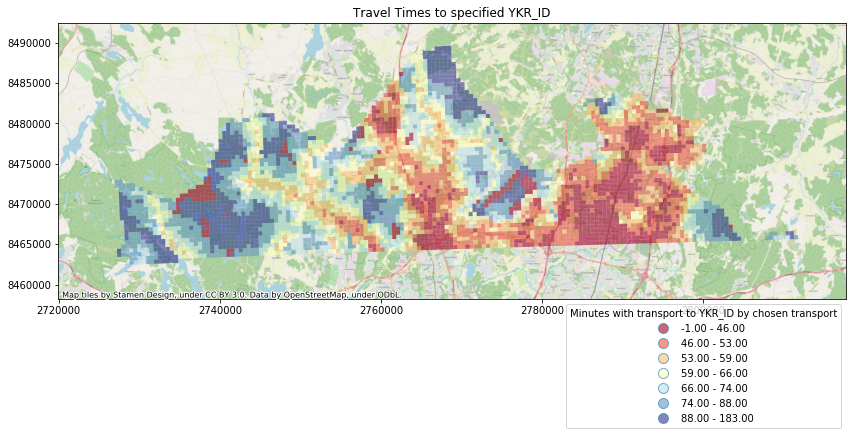

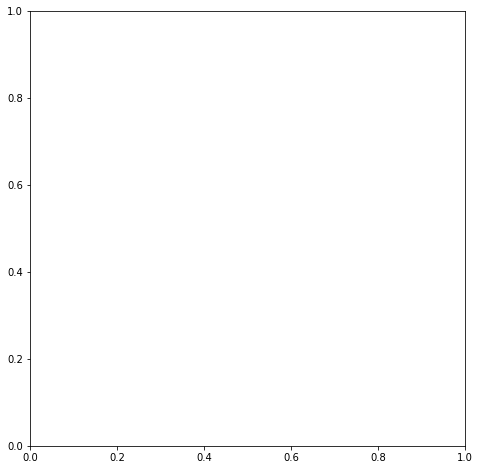

In [14]:
for idx, fp in enumerate(shp_files):
    #print(fp)
    shp_data = gpd.read_file(fp, crs=CRS )
    #print(shp_data.head())
    #shp_data.crs
    
    if map_type > 0:
        #create interactive map
        # Re-project to WGS84
        shp_data_2 = shp_data.to_crs(epsg=4326)
        #shp_data.crs
        #print(shp_data.head())

        # Create a Geo-id which is needed by the Folium (it needs to have a unique identifier for each row)
        shp_data_2['geoid'] = shp_data_2.index.astype(str)

        # Select only needed columns
        shp_data_2 = shp_data_2[['geoid', column_for_visualising, 'geometry']]
        
        # Create a Map instance
        int_map = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)
        
        # Plot a choropleth map
        int_map.choropleth(
            geo_data=shp_data_2,
            name='Population in 2017',
            data=shp_data_2,
            columns=['geoid', column_for_visualising, 'geometry'],
            key_on='feature.id',
            fill_color='YlOrRd',
            fill_opacity=0.7,
            line_opacity=0.2,
            line_color='white',
            line_weight=0,
            highlight=False,
            smooth_factor=1.0,
            #threshold_scale=[100, 250, 500, 1000, 2000],
            legend_name='Traveltimes to chosen YKR_ID in minutes')
        #checking the output
        #int_map
        
        #saving the map as html-file
        out_p_im = ('data/maps/')
        out_fp_im = os.path.join(out_p_im + YKR_ID + '.html')
        int_map.save(out_fp_im)


    else:
        
        shp_data_1 = shp_data.to_crs(epsg=3857)
        #create static map using matplotlib.plt
        print(shp_data_1.crs)
        print(shp_data_1)
        static_map = shp_data_1.plot(column=column_for_visualising, linewidth=0.03, figsize=(12, 8), cmap="RdYlBu", scheme="quantiles", k=7, alpha=0.6, legend=True)
    
        #get legend and place it at the map
        static_map.get_legend().set_title("Minutes with transport to YKR_ID by chosen transport")
        static_map.get_legend().set_bbox_to_anchor((1.0, 0.0))
    
        #set title
        static_map.set_title('Travel Times to specified YKR_ID')

        # Add basemap
        ctx.add_basemap(static_map, url = ctx.tile_providers.OSM_A)
        
        #remove empty white-space around the axes
        plt.tight_layout()
    
        # Save the figure as png file 
        out_p_sm = ('data/maps/')     
        out_fp_sm = os.path.join(out_p_sm + YKR_ID + '.png')
        plt.savefig(out_fp_sm)


 ##### Part 4
 compare traveltimes or distances between 2 different travel modes. 

##### Part 5 
Bundled with AccessViz there is also a separate interactive map that shows the YKR grid values in Helsinki region. The purpose of the map is to help the user to choose the YKR-IDs that s/he is interested to visualize / analyze.

In [6]:
import geopandas as gpd
import pandas as pd
import os

#read and take a look at the YKR_grid shp file 
grid_fp = 'data/MetropAccess_YKR_grid/MetropAccess_YKR_grid_EurefFIN.shp'

#read the file
grid_1 = gpd.read_file(grid_fp)

# See the column names
grid_1.head()
#grid.crs

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.0001388059 6697750.000128186,..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.00013875 6697750.000128181, 3..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.0001386951 6697750.000128172,..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.0001386406 6697750.000128165,..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000138978 6697500.000128254, ..."


In [7]:
# Re-project to WGS84
grid_1 = grid_1.to_crs(epsg=4326)

# Check layer crs definition
print(grid_1.crs)

# Make a selection (only data above 0 and below 1000)

# Create a Geo-id which is needed by the Folium (it needs to have a unique identifier for each row)
grid_1['geoid'] = grid_1.index.astype(str)

# Select only needed columns
grid_1 = grid_1[['geoid', 'YKR_ID', 'geometry']]

# Convert to geojson (not needed for the simple coropleth map!)
#YKRID_json = grid.to_json()

#check data
grid_1.head()


{'init': 'epsg:4326', 'no_defs': True}


,geoid,YKR_ID,geometry
0,0,5785640,"POLYGON ((24.85837499047041 60.39885552313355,..."
1,1,5785641,"POLYGON ((24.86290863246012 60.39892838104311,..."
2,2,5785642,"POLYGON ((24.86744229796249 60.39900108467782,..."
3,3,5785643,"POLYGON ((24.87197598692784 60.39907363403609,..."
4,4,5787544,"POLYGON ((24.8449225401965 60.39639293214371, ..."


In [15]:
import folium


# Create a Map instance
YKRID_map = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=11, control_scale=True)

#YKRID_map

In [14]:
# Plot a choropleth map
YKRID_map.choropleth(
    geo_data=grid_1,
    name='Population in 2017',
    data=grid_1,
    columns=['geoid', 'YKR_ID'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    line_weight=0,
    highlight=False,
    smooth_factor=1.0,
    threshold_scale=[100, 250, 500, 1000, 2000],
    legend_name= 'YKR_ID cells, Helsinki')

#saving the map
out_YKRID_map_fp = "data/maps/YKR_ID_cells_Helsinki.html"
YKRID_map.save(out_YKRID_map_fp)

#Show map
#YKRID_map